<a href="https://colab.research.google.com/github/tarun201/FastAI_movie_reviews/blob/master/Copy_of_fast_ai_movie_review11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [fast_ai_movie_review](https://github.com/navneetkrc/Colab_fastai/blob/master/NLP/fast_ai_movie_review.ipynb)



In [0]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai

In [0]:
from fastai import *
from fastai.text import * 
from fastai.gen_doc.nbdoc import *
from fastai.datasets import * 
from fastai.datasets import Config
from pathlib import Path
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [27]:
#import fastai; 
#fastai.show_install(1)
!ls

input	sample_data	      sentiment-analysis-on-movie-reviews.zip
kaggle	sampleSubmission.csv


Download data manually from [here](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data)

Then upload it on colab using below codes

In [26]:
from google.colab import files
files.upload()

{}

In [0]:
# !pip install -U -q kaggle
# !echo '{"username":"username","key":"XXxxxxxxxxxxxxxx"}'> ~/.kaggle/kaggle.json  # Replace
# #!chmod 600 kaggle.json

In [0]:
!unzip sentiment-analysis-on-movie-reviews.zip

Archive:  sentiment-analysis-on-movie-reviews.zip
  inflating: sampleSubmission.csv    
  inflating: train.tsv               
  inflating: test.tsv                


In [0]:
!mkdir -p ~/.kaggle
!mkdir -p input

Move the "test.tsv" & "train.tsv" file to the folder "input"

In [0]:
!mv test.tsv train.tsv input/

In [0]:
# !kaggle competitions download -c sentiment-analysis-on-movie-reviews

In [0]:
# !unzip test.tsv.zip -d input
# !unzip train.tsv.zip -d input
# !mv sampleSubmission.csv input/

In [0]:
path = Path('../input/')
path_working = Path('kaggle/')

In [29]:
df = pd.read_csv('input/train.tsv', sep="\t")
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [30]:
df['is_valid'] = 0
df.head()

,PhraseId,SentenceId,Phrase,Sentiment,is_valid
0,1,1,A series of escapades demonstrating the adage ...,1,0
1,2,1,A series of escapades demonstrating the adage ...,2,0
2,3,1,A series,2,0
3,4,1,A,2,0
4,5,1,series,2,0


In [31]:
df.loc[:50, 'is_valid'] = 1
df.head()

,PhraseId,SentenceId,Phrase,Sentiment,is_valid
0,1,1,A series of escapades demonstrating the adage ...,1,1
1,2,1,A series of escapades demonstrating the adage ...,2,1
2,3,1,A series,2,1
3,4,1,A,2,1
4,5,1,series,2,1


In [32]:
df_test = pd.read_csv('input/test.tsv', sep="\t")
df_test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [0]:
df.rename(index=str, columns={"Phrase": "text", "Sentiment": "target"},inplace=True)

In [0]:
df_test.rename(index=str, columns={"Phrase": "text", "Sentiment": "target"},inplace=True)

In [0]:
df_test['is_valid'] = 0

In [0]:
df_test.to_csv(f'test.csv', index=False)

In [0]:
df.to_csv(f'train.csv', index=False)

In [38]:
!mkdir kaggle
!mv train.csv kaggle/
!mv test.csv kaggle/

mkdir: cannot create directory ‘kaggle’: File exists


In [39]:
df_mod = pd.read_csv('kaggle/train.csv')
df_mod.head()

,PhraseId,SentenceId,text,target,is_valid
0,1,1,A series of escapades demonstrating the adage ...,1,1
1,2,1,A series of escapades demonstrating the adage ...,2,1
2,3,1,A series,2,1
3,4,1,A,2,1
4,5,1,series,2,1


In [40]:
path_working

PosixPath('kaggle')

#Tring unfreezing the model

In [0]:
data_lm = (TextList.from_csv(path_working, 'train.csv', cols='text') 
                   .random_split_by_pct()
                   .label_for_lm()
                   .add_test(TextList.from_csv(path_working, 'test.csv', cols='text'))
                   .databunch())

#Reduced Dropout rate to 0.5 from 0.7.

In [54]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)
#learn = language_model_learner(data_lm, pretrained_model=URLs.WT103, drop_mult=0.7)
learn.model

SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(15087, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(15087, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1150, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1150, 1150, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1150, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=15087, bias=True)
    (output_dp): RNNDropout()
  )
)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


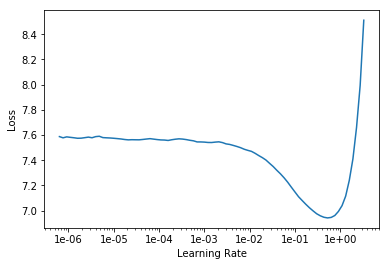

In [43]:
learn.lr_find()
learn.recorder.plot()

#Added multi unfreeze cycles

In [55]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,5.172160,4.462752,0.287776,01:06
1,4.073404,3.652309,0.363843,01:04
2,3.608288,3.286263,0.413421,01:04
3,3.365814,3.126572,0.438724,01:05
4,3.240414,3.098637,0.442669,01:04


In [56]:
learn.freeze_to(-1)
learn.fit_one_cycle(3, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.331991,3.089046,0.443028,01:04
1,3.223380,2.937177,0.467083,01:04
2,3.063249,2.886285,0.476468,01:05


In [57]:
learn.fit(2,1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.017077,2.859372,0.481397,01:06
1,3.004653,2.838430,0.484811,01:04


In [59]:
learn.fit(3,1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.979459,2.820646,0.488030,01:06
1,2.957224,2.803792,0.491497,01:04
2,2.945004,2.789999,0.493663,01:04


In [61]:
learn.fit(3,1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.930412,2.776482,0.496551,01:06
1,2.937188,2.764013,0.498441,01:04
2,2.919678,2.752374,0.501039,01:04


In [62]:
learn.fit(3,2e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.906770,2.737204,0.504032,01:06
1,2.899098,2.718924,0.506142,01:04
2,2.883143,2.703583,0.509361,01:04


In [63]:
learn.fit(3,5e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.912257,2.700712,0.509103,01:05
1,2.910314,2.679288,0.512263,01:05
2,2.865291,2.658268,0.517323,01:05


In [0]:
learn.save("savedModel")

In [66]:
learn.freeze_to(-2)
learn.fit_one_cycle(3+3, 4e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.255345,2.173153,0.600942,01:08
1,2.334259,2.170434,0.600816,01:07
2,2.294566,2.124958,0.610599,01:07
3,2.203653,2.078455,0.620689,01:07
4,2.117585,2.050076,0.626793,01:07
5,2.078811,2.044405,0.628477,01:07


**Run the above code twice**

In [0]:
learn.save("savedModel-2")

In [68]:
learn.fit(5,1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.095766,2.033547,0.630859,01:08
1,2.078375,2.022199,0.632889,01:07
2,2.062435,2.011784,0.635052,01:07
3,2.043193,2.003843,0.636796,01:07
4,2.044197,1.997083,0.638299,01:07


In [69]:
learn.fit(3,3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.114629,2.008105,0.633817,01:08
1,2.096038,2.002430,0.637622,01:07
2,2.078814,1.987374,0.639157,01:07


In [0]:
learn.save("savedModel-2")

In [71]:
learn.fit(3,2e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.027564,1.966539,0.643565,01:08
1,2.009115,1.956290,0.645421,01:07
2,1.989089,1.944676,0.648002,01:07


In [0]:
learn.save("savedModel-2")

In [73]:
learn.fit(5,2e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.997508,1.946153,0.649424,01:08
1,1.980083,1.935359,0.650624,01:07
2,1.973094,1.929273,0.651228,01:07
3,1.966427,1.923821,0.652696,01:07
4,1.964052,1.922707,0.654265,01:07


In [0]:
learn.save("savedModel-2")

In [75]:
learn.fit(3,2e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.933253,1.915321,0.654802,01:08
1,1.949666,1.909544,0.655002,01:07
2,1.936222,1.905821,0.656201,01:07


In [0]:
learn.save("savedModel-2")

In [77]:
learn.freeze_to(-4)
learn.fit_one_cycle(8, 5e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.852063,1.886482,0.659720,01:23
1,1.984750,1.922302,0.649093,01:22
2,1.942445,1.889490,0.654272,01:22
3,1.835708,1.844036,0.663766,01:22
4,1.763220,1.802920,0.671690,01:22
5,1.667196,1.780007,0.677522,01:22
6,1.584063,1.774262,0.680828,01:22
7,1.555885,1.774198,0.680810,01:22


In [0]:
learn.save("savedModel-4")

In [79]:
learn.fit(3,2e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.636070,1.779312,0.679391,01:22
1,1.631817,1.777656,0.678547,01:22
2,1.616540,1.780479,0.680908,01:22


In [0]:
learn.save("savedModel-4")

In [81]:
learn.unfreeze()
learn.fit_one_cycle(3+6, 5e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.561276,1.782862,0.682052,01:22
1,1.656931,1.803780,0.673549,01:22
2,1.731367,1.819209,0.672042,01:22
3,1.720898,1.809108,0.673933,01:21
4,1.663093,1.793990,0.678352,01:21
5,1.606848,1.781675,0.681166,01:22
6,1.552146,1.775392,0.683977,01:22
7,1.510562,1.775196,0.684253,01:22
8,1.473407,1.777849,0.684427,01:22


In [0]:
learn.save("savedModelfinal")

In [83]:
learn.fit(2,1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.514230,1.778187,0.684124,01:22
1,1.505703,1.777677,0.684298,01:22


In [0]:
learn.save('mini_train_lm')
learn.save_encoder('mini_train_encoder')

In [0]:
#load the encoder models in models folder
# !mkdir kaggle/models
# !mv mini_train_encoder.pth kaggle/models/
# !mv mini_train_lm.pth kaggle/models/

In [0]:
#learn.load_encoder('ft_enc53')
learn.load_encoder('mini_train_encoder')

In [87]:
learn.show_results()

text,target,pred
xxbos queasy infatuation and overall strangeness xxbos xxmaj idemoto and xxmaj kim make a gorgeous pair ... their scenes brim,"with sexual possibility and emotional danger xxbos makes the princess seem smug and cartoonish xxbos its exquisite acting , inventive","with sexual possibility and emotional danger xxbos xxmaj xxmaj silly seem smug and cartoonish xxbos xxmaj own acting , inventive"
"their own game , this blaxploitation spoof downplays the raunch in favor of gags that rely on the strength of",their own cleverness as opposed to the extent of their outrageousness . xxbos xxup -lrb- very xxup -rrb- xxbos penned,their own cleverness as opposed to the extent of their outrageousness . xxbos xxmaj -lrb- xxmaj xxup -rrb- xxbos xxmaj
"a frustrating misfire xxbos shrewd enough xxbos it is nonjudgmental , and makes clear that a prostitute can be as",lonely and needy as any of the clients xxbos wildly uneven xxbos simple and innocent xxbos xxmaj lyne 's xxbos,lonely and needy as any of the clients xxbos xxmaj unsentimental hit xxmaj - precise xxbos xxmaj the 's latest
should care xxbos desire to enjoy good trash every now and then . xxbos movies that demand four hankies xxbos,"xxmaj once the expectation of laughter has been quashed by whatever obscenity is at hand , even the funniest idea",xxmaj the the expectation of laughter has been quashed by whatever obscenity is at hand xxbos this if funniest idea
that had no obvious directing involved . xxbos xxmaj the dark and bittersweet twist feels strange as things turn nasty,"and tragic during the final third of the film . xxbos is one of those crazy , mixed - up","and tragic during the final third of the film . xxbos xxmaj a of the films , mixed - up"


In [0]:
# !nvidia-smi

In [0]:
# ??TextList.from_csv

Increased BS to **70** from **42**

In [0]:
data_clas = (TextList.from_csv(path_working, 'train.csv',cols='text', vocab=data_lm.vocab)
    .split_from_df(col='is_valid') #is_valid
    .label_from_df(cols='target')
    .add_test(TextList.from_csv(path_working, 'test.csv', cols='text'))
    .databunch(bs=70))


In [91]:
!nvidia-smi
# type(data_clas.test_dl)

Tue May 14 06:42:23 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.56       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0    32W /  70W |   5303MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [92]:
data_clas.show_batch()

text,target
"xxbos xxup -lrb- xxmaj city xxup -rrb- reminds us how realistically nuanced a xxmaj robert xxmaj de xxmaj niro performance can be when he is not more lucratively engaged in the shameless self - caricature of ` xxmaj analyze xxmaj this ' xxup -lrb- 1999 xxup -rrb- and ` xxmaj analyze xxmaj that , ' promised xxup -lrb- or threatened xxup -rrb- for later this year .",3
"xxbos xxmaj sitting in the third row of the xxup imax cinema at xxmaj sydney 's xxmaj darling xxmaj harbour , but i sometimes felt as though i was in the tiny two seater plane that carried the giant camera around xxmaj australia , sweeping and gliding , banking and xxunk over some of the most not",3
"xxbos xxmaj build some robots , haul 'em to the theatre with you for the late show , and put on your own xxmaj mystery xxmaj science xxmaj theatre 3000 tribute to what is almost certainly going to go down as the worst -- and only -- killer website movie of this or any other year",0
"xxbos xxmaj the star who helped give a spark to `` xxmaj chasing xxmaj amy '' and `` xxmaj changing xxmaj lanes '' falls flat as thinking man xxup cia agent xxmaj jack xxmaj ryan in this summer 's new action film , `` xxmaj the xxmaj sum of xxmaj all xxmaj fears",1
"xxbos has all the trappings of an energetic , extreme - sports adventure , but ends up more of a creaky `` xxmaj pretty xxmaj woman '' retread , with the emphasis on self - empowering schmaltz and big - wave surfing that gives pic its title an afterthought .",1


In [0]:
#??text_classifier_learner()

In [94]:
data_clas.c

5

In [0]:
#len(data_clas.vocab.itos)

In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM,drop_mult=0.5)
learn.load_encoder('mini_train_encoder')
# learn = text_classifier_learner(data_clas,AWD_LSTM,drop_mult=0.5)
learn.model;

In [0]:
#learn.crit = F.binary_cross_entropy
learn.crit = F.binary_cross_entropy_with_logits

In [98]:
# learn.load_encoder('mini_train_encoder')
learn.fit_one_cycle(9, slice(1e-3,5e-3))
learn.save('mini_train_clas')

epoch,train_loss,valid_loss,accuracy,time
0,1.111139,0.644573,0.803922,00:59
1,1.127318,0.623081,0.823529,00:59
2,1.109141,0.564955,0.823529,00:50
3,1.096242,0.523790,0.843137,00:52
4,1.028246,0.510805,0.803922,00:57
5,1.073566,0.530548,0.823529,00:58
6,1.045251,0.581176,0.803922,00:52
7,1.051986,0.622325,0.784314,00:47
8,1.062708,0.563339,0.862745,00:48


In [0]:
learn.save('mini_train_clas')

In [0]:
learn.load('mini_train_clas');

In [100]:
# learn.fit(3, slice(5e-3/2., 5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.071487,0.539434,0.823529,00:58
1,1.066652,0.553382,0.823529,00:53
2,1.065366,0.535724,0.803922,01:00


In [0]:
learn.freeze_to(-1)
learn.fit_one_cycle(6, slice(5e-3/2., 5e-3))

In [104]:
learn.freeze_to(-2)
learn.fit_one_cycle(5, slice(5e-3/2., 5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.989876,0.535819,0.784314,01:12
1,0.951453,0.618190,0.705882,01:07
2,0.860581,0.492814,0.784314,01:11
3,0.799316,0.526054,0.705882,01:08
4,0.783181,0.556411,0.705882,00:59


In [105]:
learn.freeze_to(-3)
learn.fit_one_cycle(5, slice(1e-3,1e-2))

epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: ignored

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(2e-3/100, 2e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.932552,0.536011,0.803922,02:37
1,0.750869,0.494392,0.745098,02:24


In [0]:
# learn.fit_one_cycle(2, slice(1e-3,1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.813014,0.511871,0.784314,02:08
1,0.733190,0.622333,0.745098,02:12


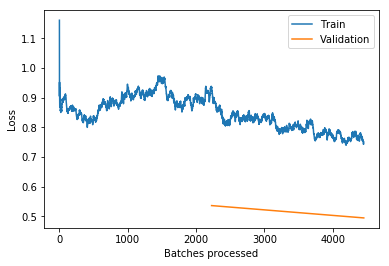

In [0]:
learn.recorder.plot_losses()

Tried unfreezing gradually
End result not satisfying

In [0]:
# # get predictions
# preds, targets = learn.get_preds()

# predictions = np.argmax(preds, axis = 1)
# pd.crosstab(predictions, targets)

In [0]:
# learn.show_results()

In [0]:
# predictions
# learn.get_preds()
# df["text"].iloc[5]

In [0]:
# probs = np.mean(np.exp(preds),0)
# # probs = np.mean(np.exp(preds),dtype=np.float32)


In [0]:
# preds = np.argmax(probs, axis=1)
# probs = probs[:,1]

# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y, preds)

# plot_confusion_matrix(cm, data.classes)

In [0]:
# Language model data
#data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "")

# Classifier model data
#data_clas = TextClasDataBunch.from_df(path = "", train_df = df_trn, valid_df = df_val, vocab=data_lm.train_ds.vocab, bs=32)

In [0]:
#type(learn.data.test_dl)

In [0]:
# probs, _ = learn.get_preds(DatasetType.Test)

In [0]:
# probs.shape

In [0]:
# probs[0]

In [0]:
# preds = np.argmax(probs, axis=1)

In [0]:
# ids = df_test["PhraseId"].copy()

In [0]:
# # submission = pd.DataFrame(data={
#     "PhraseId": ids,
#     "Sentiment": preds
# })
# submission.to_csv("submission.csv", index=False)
# submission.head(n=10)

In [0]:
#df.head()

In [0]:
#from sklearn.model_selection import train_test_split

# split data into training and validation set
#df_trn, df_val = train_test_split(df, stratify = df['target'], test_size = 0.4, random_state = 12)

In [0]:
# Language model data
#data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "../input")


In [0]:

# Classifier model data
#data_clas = TextClasDataBunch.from_df(path = "", train_df = df_trn, valid_df = df_val, vocab=data_lm.train_ds.vocab, bs=32)